In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
series1=[1, 4, 7, 8, 10, 9, 6, 5, 2, 3, 3]
series2=[1, 1, 4, 7, 8, 10, 9, 6, 5, 2, 3]

cost = np.zeros((len(series1), len(series2))) 
DTW = np.ones((len(series1)+1, len(series2)+1)) 
DTW = DTW*np.infty 

# Time window
w = np.max([300, abs(len(series1)-len(series2))]) 
 
DTW[0,0] = cost[0,0] 
        
for i in range(1, len(series1)+1):
    for j in range(np.max([1, i-w]), np.min([len(series2)+1, i+w])):   
        cost[i-1,j-1] = abs(series2[j-1]-series1[i-1]) 
        DTW[i,j] = min(DTW[i-1, j-1], DTW[i-1, j], DTW[i, j-1]) + cost[i-1,j-1] 
        
DTW = DTW[1:,1:] 
        
print("The DTW cost is ", DTW[len(series1)-1, len(series2)-1])
print(DTW)

The DTW cost is  0.0
[[ 0.  0.  3.  9. 16. 25. 33. 38. 42. 43. 45.]
 [ 3.  3.  0.  3.  7. 13. 18. 20. 21. 23. 24.]
 [ 9.  9.  3.  0.  1.  4.  6.  7.  9. 14. 18.]
 [16. 16.  7.  1.  0.  2.  3.  5.  8. 14. 19.]
 [25. 25. 13.  4.  2.  0.  1.  5. 10. 16. 21.]
 [33. 33. 18.  6.  3.  1.  0.  3.  7. 14. 20.]
 [38. 38. 20.  7.  5.  5.  3.  0.  1.  5.  8.]
 [42. 42. 21.  9.  8. 10.  7.  1.  0.  3.  5.]
 [43. 43. 23. 14. 14. 16. 14.  5.  3.  0.  1.]
 [45. 45. 24. 18. 19. 21. 20.  8.  5.  1.  0.]
 [47. 47. 25. 22. 23. 26. 26. 11.  7.  2.  0.]]


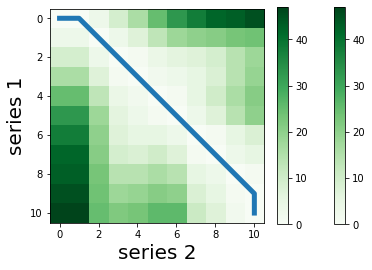

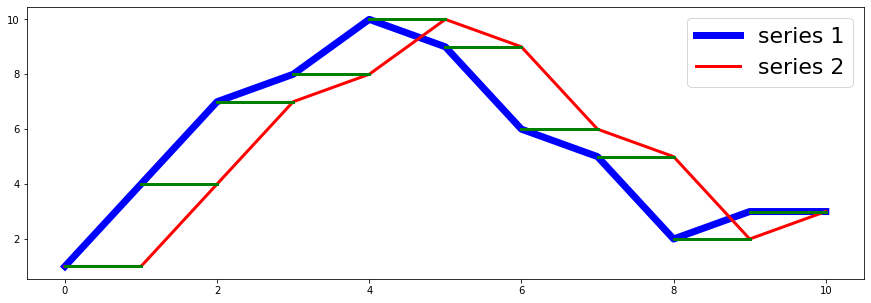

In [4]:
def distance_distance_plot(DTW):
    im = plt.imshow(DTW, interpolation='nearest', cmap='Greens') 
    plt.xlabel("series 2", fontsize=20)
    plt.ylabel("series 1", fontsize=20)
    plt.grid()
    plt.colorbar();
distance_distance_plot(DTW)

path = [[len(series2)-1, len(series1)-1]]
i = len(series1)-1
j = len(series2)-1
while i>0 or j>0: 
    if i==0:     
        j = j - 1
    elif j==0:
        i = i - 1
    else:
        if DTW[i-1, j] == min(DTW[i-1, j-1], DTW[i-1, j], DTW[i, j-1]):
            i = i - 1
        elif DTW[i, j-1] == min(DTW[i-1, j-1], DTW[i-1, j], DTW[i, j-1]):
            j = j-1
        else:
            i = i - 1
            j = j - 1
    path.append([j, i])


path_x = [point[0] for point in path]
path_y = [point[1] for point in path]
distance_distance_plot(DTW)
plt.plot(path_x, path_y, linewidth=5.0);

def path_DTW(series2, series1, DTW, cost):
    path = [[len(series2)-1, len(series1)-1]]
    DTW_new = 0
    i = len(series1)-1
    j = len(series2)-1
    while i>0 or j>0:  
        if i==0:     
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if DTW[i-1, j] == min(DTW[i-1, j-1], DTW[i-1, j], DTW[i, j-1]):
                i = i - 1
            elif DTW[i, j-1] == min(DTW[i-1, j-1], DTW[i-1, j], DTW[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j = j - 1
        path.append([j, i])
    for [series1, series2] in path:
        DTW_new = DTW_new + cost[series2, series1]
    return path, DTW_new


plt.figure(figsize=(15,5))
plt.plot(series1, 'b-', label = 'series 1', linewidth=7)
plt.plot(series2, 'r-' ,label='series 2', linewidth=3)

plt.legend(fontsize=22);
paths = path_DTW(series2, series1, DTW, cost)[0]
for [map_x, map_y] in paths:
    plt.plot([map_x, map_y], [series2[map_x], series1[map_y]], 'g', linewidth=3)


Print the path

In [5]:
print(path)

[[10, 10], [10, 9], [9, 8], [8, 7], [7, 6], [6, 5], [5, 4], [4, 3], [3, 2], [2, 1], [1, 0], [0, 0]]


In [6]:
for [map_x, map_y] in paths:
    print(map_x, series2[map_x], ":", map_y, series1[map_y]) 

10 3 : 10 3
10 3 : 9 3
9 2 : 8 2
8 5 : 7 5
7 6 : 6 6
6 9 : 5 9
5 10 : 4 10
4 8 : 3 8
3 7 : 2 7
2 4 : 1 4
1 1 : 0 1
0 1 : 0 1
